# Decision Tree
A decision tree is a popular machine learning algorithm that uses a tree-like structure to make predictions or decisions based on input features. There are different types of decision trees, including:

1. Classification Tree
2. Regression Tree 

Entropy, Gini impurity, and information gain are key concepts used in decision tree algorithms to measure the quality of attribute splits. Let's define each of them:

1. Entropy:
Entropy is a measure of impurity or disorder in a set of examples. In the context of decision trees, it quantifies the uncertainty or randomness of the class labels within a node. It is calculated using the following formula: Entropy(S) = - Σ (p_i * log2(p_i)) where S represents the set of examples in a node, p_i is the proportion of examples in S belonging to class i, and the summation is performed over all classes. The entropy value ranges from 0 (pure node) to 1 (maximum impurity).

2. Gini Impurity:
Gini impurity is another measure of impurity used in decision trees, particularly in classification tasks. It calculates the probability of misclassifying a randomly chosen element in a node. The Gini impurity for a node is given by: Gini(S) = 1 - Σ (p_i^2) where S represents the set of examples in a node, p_i is the proportion of examples in S belonging to class i, and the summation is performed over all classes. The Gini impurity value ranges from 0 (pure node) to 0.5 (maximum impurity).

3. Information Gain:
Information gain is a metric used to evaluate the quality of a split in a decision tree. It measures the reduction in entropy or Gini impurity achieved by splitting the data based on a particular attribute. The attribute with the highest information gain is selected as the splitting criterion. Mathematically, information gain is calculated as: Information Gain(S, A) = Entropy(S) - Σ ((|S_v| / |S|) * Entropy(S_v)) or Information Gain(S, A) = Gini(S) - Σ ((|S_v| / |S|) * Gini(S_v)) where S is the set of examples in the current node, A is the attribute being considered for splitting, S_v represents the subset of examples in S that have a specific value for attribute A, and |S_v| and |S| represent the number of examples in S_v and S, respectively.

## First we will see Decision Tree terminologies of an Example Dataset

In [1]:
import math

In [2]:
# Suppose in a dataset of 10 elements, 4 are of class A and 6 are of class 

# Number of elements in each class
n_A = 4
n_B = 6
total = n_A + n_B

In [3]:
# Let's calculate the proportion of each class
p_A = n_A / total
p_B = n_B / total

# print the propotions
print(f"Proportion of A is {p_A}")
print(f"Proportion of B is {p_B}")


Proportion of A is 0.4
Proportion of B is 0.6


## 1. Entropy:

In [4]:
entropy = - p_A * math.log2(p_A) - p_B * math.log2(p_B)
entropy

0.9709505944546686

## 2. Gini Impurity:

In [5]:
gini = 1 - p_A**2 - p_B**2
gini

0.48

## 3. Information Gain:

In [6]:
# Assuming a split on some feature divides the dataset into two subsets
# Subset 1: 2 elements of A, 3 of B
# Subset 2: 2 elements of A, 3 of B
# Entropy and size for each subset
n_1_A, n_1_B = 2, 3
n_2_A, n_2_B = 2, 3

p_1_A = n_1_A / (n_1_A + n_1_B)
p_1_B = n_1_B / (n_1_A + n_1_B)
entropy_1 = -p_1_A * math.log2(p_1_A) - p_1_B * math.log2(p_1_B) if p_1_A and p_1_B else 0

p_2_A = n_2_A / (n_2_A + n_2_B)
p_2_B = n_2_B / (n_2_A + n_2_B)
entropy_2 = -p_2_A * math.log2(p_2_A) - p_2_B * math.log2(p_2_B) if p_2_A and p_2_B else 0

# Calculating information gain
info_gain = entropy - ((n_1_A + n_1_B) / total * entropy_1 + (n_2_A + n_2_B) / total * entropy_2)
print("Information Gain: ", info_gain)

Information Gain:  0.0


Based on our example dataset with two classes (A and B), we have calculated the following values:

**Entropy:** The calculated entropy of the dataset is approximately 0.971. This value indicates a moderate level of disorder in the dataset, considering that it's not very close to 0 (which would mean no disorder) and not at its maximum (which would mean complete disorder for a binary classification).

**Gini Impurity:** The Gini impurity for the dataset is 0.48. This value, being less than 0.5, suggests some level of purity in the dataset but still indicates a mix of classes A and B.

**Information Gain:** The information gain from the chosen split is 0.0. This result implies that the split did not reduce the entropy or disorder of the dataset. In other words, the split did not add any additional information that could help distinguish between classes A and B more effectively than before.

These metrics provide insight into the nature of the dataset and the effectiveness of potential splits when constructing a decision tree. In practical applications, you would use these calculations to choose the best feature and split at each node in the tree to maximize the purity of the subsets created.

---

In [7]:
# import the liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

# import ML liberaries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

## 1. Decision Tree For Classification

In [8]:
# load the dataset
df = sns.load_dataset('titanic')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [10]:
# check missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
df.drop('deck', axis = 1, inplace = True)

In [12]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
# impute missing values using SimpleImputer using median in age and fare column
imputer = SimpleImputer(strategy = 'median')
df[['age', 'fare']] = imputer.fit_transform(df[['age', 'fare']])  

# impute missing values in embark and embarked_town using mode
imputer = SimpleImputer(strategy = 'most_frequent')
df[['embark_town', 'embarked']] = imputer.fit_transform(df[['embark_town', 'embarked']])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [15]:
# Now, using LabelEncoder convert categorical and object dtype into numerical dtype
for column in df.columns:
    if df[column].dtype == 'object' or df[column].dtype.name == 'category':
        df[column] = LabelEncoder().fit_transform(df[column])

In [16]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int32  
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    int32  
 8   class        891 non-null    int32  
 9   who          891 non-null    int32  
 10  adult_male   891 non-null    bool   
 11  embark_town  891 non-null    int32  
 12  alive        891 non-null    int32  
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int32(6), int64(4)
memory usage: 64.5 KB


In [18]:
# Choose Feathers (X) and Labels (y)
X = df.drop(['survived', 'alive'], axis = 1)
y  = df['survived']

In [19]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
# call the model
model = DecisionTreeClassifier(criterion='entropy', max_depth = 5) # default is gini


In [21]:
# fit the model
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [22]:
# prediction
y_pred = model.predict(X_test)

In [23]:
# evaluation of model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[92 13]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



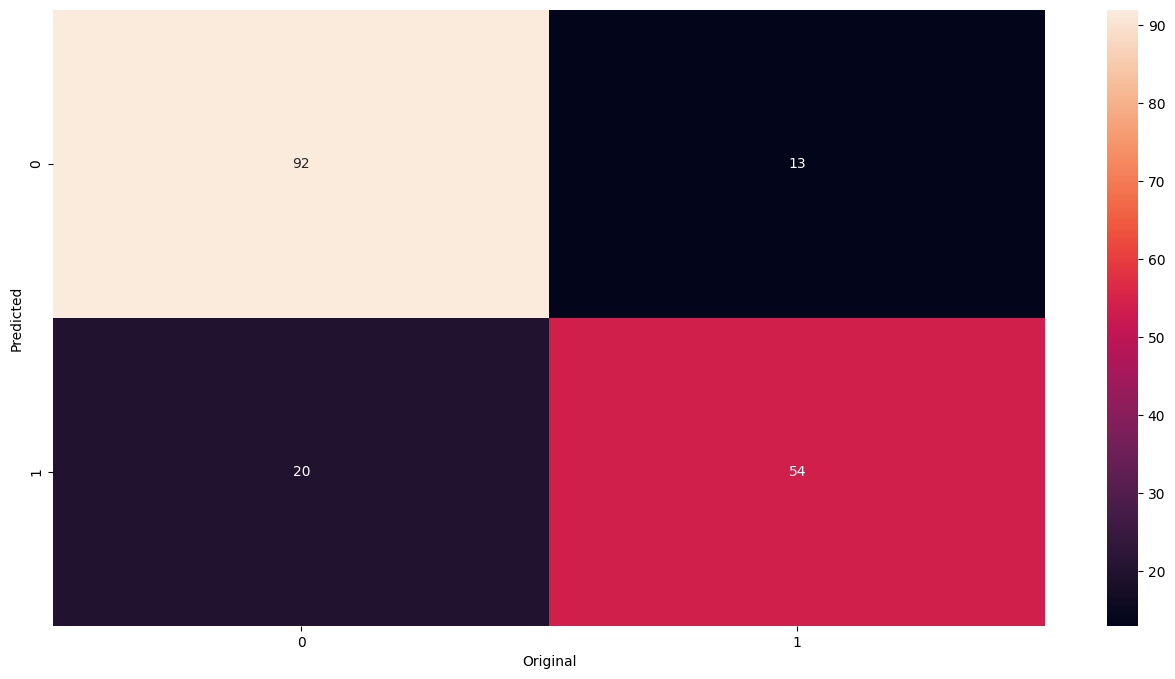

In [24]:
# Let's plot the confusion matrix
plt.figure(figsize = (16, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.show()

In [25]:
# save the decision tree classifier
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='./saved_models/decision_tree_02.dot', feature_names=X.columns, filled=True, rounded=True)

## 2. Decision Tree For Regression

In [26]:
# load teh dataset
df = sns.load_dataset('tips')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [27]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [37]:
# LabelEncooding
for column in df.columns:
    if df[column].dtype.name == 'category':
        df[column] = LabelEncoder().fit_transform(df[column])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int32  
 3   smoker      244 non-null    int32  
 4   day         244 non-null    int32  
 5   time        244 non-null    int32  
 6   size        244 non-null    int64  
dtypes: float64(2), int32(4), int64(1)
memory usage: 9.7 KB


In [39]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [40]:
# Choose Features (X) and Labels (y)
X = df.drop('tip', axis = 1)
y = df['tip']

In [41]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [42]:
# call the model
model = DecisionTreeRegressor()

In [43]:
# train the model
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [44]:
# prediction
y_pred = model.predict(X_test)

In [45]:
# evaluate the model
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R2: {r2_score(y_test, y_pred)}")

MSE: 1.1435489795918368
RMSE: 1.0693684956982026
R2: 0.08513984427198196
